# Theoretical Clustering Guarantees 
We want to check the theoretical clustering guarantee conditions make in the "Dimensionality Reduction via Dynamical Systems" paper, first on a small dataset and then on flow. 

We want to visualize the $P$ matrices and look at whether we find clear clusters. 

## Iris dataset 

In [3]:
%matplotlib inline 
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt 

In [6]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris[features]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
import openTSNE

p_ij_30 = openTSNE.affinity.PerplexityBasedNN(
    iris[features].to_numpy(),
    perplexity=30, 
    n_jobs=-1,
    random_state=12,
    verbose=True
    )

===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.11 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds


In [15]:
P = p_ij_30.P.toarray()  # Convert sparse matrix to dense format

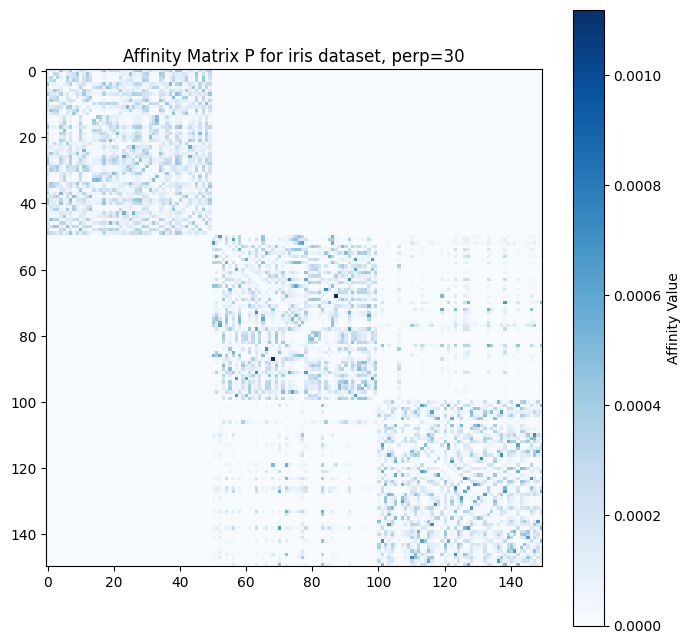

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(P, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Affinity Value")
plt.title("Affinity Matrix P for iris dataset, perp=30")
plt.show()


In [ ]:
# in the Iris dataset, the values are automatically organized by cluster label, the first 50 ones corresponding to label 1 and so on
# we now want to check assumption 

## flow dataset

In [23]:
import flowkit as fk 

# Pre-processing data 
sample = fk.Sample('data/flow18_annotated.fcs', sample_id='flow18', channel_labels=('Parameter_1', 'Parameter_10', 'Parameter_11', 'Parameter_12', 'Parameter_13', 'Parameter_14', 'Parameter_15', 'Parameter_16', 'Parameter_17', 'Parameter_18', 'Parameter_19', 'Parameter_2', 'Parameter_20', 'Parameter_21', 'Parameter_22', 'Parameter_23', 'Parameter_24', 'Parameter_3', 'Parameter_4', 'Parameter_5', 'Parameter_6', 'Parameter_7', 'Parameter_8', 'Parameter_9', 'SampleID', 'class'))
df_events = sample.as_dataframe(source="raw")

# only use selected columns 
selected_columns = [
    'Parameter_10', 'Parameter_11', 'Parameter_12', 
    'Parameter_13', 'Parameter_15', 'Parameter_18', 'Parameter_20', 
    'Parameter_21', 'Parameter_23', 'Parameter_8', 'Parameter_9', 'class'
]

df_filtered = df_events[selected_columns]

In [24]:
features_flow = df_filtered.drop(columns=['class'])  # All columns except 'class'
labels_flow = df_filtered['class']  # Only the 'class' column

In [25]:
p_ij_flow_50 = openTSNE.affinity.PerplexityBasedNN(
    features_flow.to_numpy(),
    perplexity=50, 
    n_jobs=-1,
    random_state=12,
    verbose=True
)

===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 887.45 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 386.12 seconds


In [ ]:
P_flow = p_ij_flow_50.P.toarray()  # Convert sparse matrix to dense format

In [1]:
plt.figure(figsize=(8, 8))
plt.imshow(p_ij_flow_50, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Affinity Value")
plt.title("Affinity Matrix P for flow dataset, perp=50")
plt.show()

NameError: name 'plt' is not defined